In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ant Colony Optimization


## Introcudtion to Swarm Intelligence

   Swarm intelligence is an artificial or natural intelligence technique. It is based on studying collective behavior in decentralized and self-organized systems. It simulates the social structures and interactions of the swarm rather than the structure of an individual in traditional artificial intelligence. The individuals can be regarded as agents with simple and single abilities. Some of them have the ability to evolve themselves when dealing with certain problems to make better compatibility
   
   There are various intelligence examples in nature such as Ant colonies, Bee beehives, Fish schooling, Bird flocking, Bacterial growth, and microbial intelligence. Swarm intelligence has many biological advantages. For example, birds steal information using up to a fifth less energy than those that fly solo. In addition, Swarm intelligence is modeled for the purpose of understanding microscopic (global) transformations. Furthermore, it allows getting ideas for artificial systems the similar proprieties.
   
  Swarm intelligence system usually consists of a group of simple individuals autonomously controlled by a plain set of rules and local interactions. These individuals are not necessarily unwise, but are relatively simple compared to the global intelligence achieved through the system. Some intelligent behaviors never observed in a single individual will soon emerge when several individuals begin cooperate or compete. The swarm can complete the tasks that a complex individual can do while having high robustness and flexibility and low cost. Swarm intelligence takes the full advantage of the swarm without the need of centralized control and global model, and provides a great solution for large-scale sophisticated problems.
    

## Intcoduction to Ant Colony Optimization

Ant Colony Optimization (ACO) technique is purely inspired from the foraging behaviour of ant colonies, first introduced by Marco Dorigo in the 1990s. Ants are insects that prefer community survival and sustaining rather than as individual species. They communicate with each other using sound, touch and pheromone. Pheromones are organic chemical compounds secreted by the ants that trigger a social response in members of same species. These are chemicals capable of acting like hormones outside the body of the secreting individual, to impact the behaviour of the receiving individuals. Since most ants live on the ground, they use the soil surface to leave pheromone trails that may be followed (smelled) by other ants. To get the food, ants use the shortest path available from the food source to the colony. Now ants going for the food secret the pheromone and other ants follow this pheromone to follow the shortest route. 

Since more ants use the shortest route so the concentration of the pheromone increase and the rate of evaporation of pheromone to other paths will be decreased. the more the ants go on a way, the more alluring the way becomes for back to back ants. Moreover, an ant utilizing a short course to a sustenance source will come back to the home sooner and, consequently, stamp its way twice, before the landing of different ants. This straight forwardly impacts the choice likelihood for the following insect leaving the home to search for food. After some time, as more ants are fit to finish the shorter course. Hence on shorter ways pheromone gathers speedier and the more extended ways' pheromones decrease.

Ant colonies have a built-in optimization capability: by the use of probabilistic rules based on local information they
can find the shortest path between two points in their environment.  It is possible to design artificial ants that, by moving on a graph modeling the double bridge, find the shortest path between the two nodes corresponding to the nest and to the food source.

In computer science and operations research, the ant colony optimization algorithm is a probabilistic technique for solving computational problems which can be reduced to finding good paths through graphs. Artificial ants stand for multi-agent methods inspired by the behavior of real ants. The pheromone-based communication of biological ants is often the predominant paradigm used.
<p style="font-weight:bold">The essential idea of an ACO model is that good solutions are not the result of a sporadic good approach to the problem but the incremental output of good partial solutions item. </p>



## Math concepts used in Ant Colony Optimization


### 1. Graphs

A graph is a structure amounting to a set of objects in which some pairs of the objects are in some sense "related". The objects are represented by abstractions called vertices (also called nodes or points) and each of the related pairs of vertices is called an edge (also called link or line).

A graph is a pair $G = (V, E)$, where $V$ is a set whose elements are called vertices (singular: vertex), and $E$ is a set of unordered pairs
${\displaystyle \{v_{1},v_{2}\}}$ of vertices, whose elements are called edges (sometimes links or lines).

There are different types of graphs, including, but not limited to:
* Undirected Graphs: A graph in which edges have no direction
* Directed Graphs: A graph in which edges have a direction
* Weighted Graphs: A graph in which edges have weights or costs associated with them.
* Unweighted Graphs: A graph in which edges have no weights or costs associated with them.
* Trees: A connected graph with no cycles.

A graph can be represented using either an Adjecency Matrix or an Adjecency List.
* An adjacency matrix is a way of representing a graph as a matrix of boolean (0’s and 1’s).
![adjacency matrix](images/matrix.jpg)
* An array of Lists is used to store edges between two vertices. The size of array is equal to the number of vertices (i.e, n). An adjacency list is a way of representing a graph where each vertex (node) has a list of adjacent vertices. This list shows which vertices are directly connected to each vertex via edges.
![adjacency_list](images/list.png)


Graphs play a crucial role in the context of Ant Colony Optimization (ACO). ACO algorithms operate on weighted graphs. The ant colony and food source act as vertices, while the paths represent the edges. Pheromone values associated with the edges serve as weights. 

### 2. Probability, statistics and pheromone calculations in Ant Colony Optimization

ACO algorithms are probabilistic in nature. They rely on probabilities to guide ants’ decision-making during their search for optimal solutions. Ants probabilistically choose paths based on the concentration of pheromone trails left by other ants. The more pheromone a trail has, the higher chance it has to be taken by the ant. ACO balances between exploring new paths and exploiting known good paths. The use of probabilities in choosing paths ensures a mixture of both strategies. Statistical measures like mean and variance of path lengths can help monitor this balance and adjust parameters accordingly.

An ant will move from node $i$ to node $j$ with probability:
$$ p_{i,j}^k =  \frac{(\tau_{i,j}^\alpha)(\eta_{i,j}^\alpha)}{\sum_{l\in N_i^n}(\tau_{i,l}^\alpha)(\eta_{i,l}^\alpha)} $$

Where:
* $p_{i,j}^k$ is the probability that that ant $k$ will move from node $𝑖$ to node $j$
* $\tau_{i,j}$ is the amount of pheromone on edge $i, j$
* $\eta_{i,j}$ is a heuristic value, indicating the desirability of the edge based on some predefined criteria related to the problem being solved. $i,j$
* $\alpha$ and $\beta$ are parameters that control the relative importance of pheromone versus heuristic value.
* $ N_i^k $ is the set of nodes that ant $k$ can move to from node $i$

The probabilistic values are stored in a probabilistic matrix $p_{i,j}^{(n)}$, while the pheromone values are stored in a pheromone matrix $\tau_{i,j}^{(n)}$

At run-time, ACO algorithms try to update the pheromone values in such a way that the probability to generate high-quality solutions increases over time. There are two main phases of pheromone updates - pheromone evaporation and pheromone deposition.


#### Pheromone Evaporation
Pheromone evaporation is applied to all edges in the graph to simulate it's natural evaporation over time. After all the ants have constructed their tours, the pheromone trails are updated. This is done by first lowering the pheromone value on all arcs by a constant factor, and then adding pheromone on the arcs the ants have crossed in their tours. Pheromone evaporation is implemented by The amount of pheromone on each edge is updated according to the equation:

$$ \tau_{i,j} \leftarrow(1-\rho)\tau_{i,j} \;,\; \forall(i,j)\in L$$

Where:
* $\tau_{i,j}$ is the amount of pheromone on a given edge $i,j$
* $\rho$ is the rate of pheromone evaporation $\left(0<\rho<1\right)$

If an arc is not chosen by the ants, its associated pheromone value decreases exponentially in the number of iterations.


#### Pheromone Deposition
After evaporation, ants deposit new pheromones on the edges they have used in their solutions. The amount of pheromone deposited typically depends on the quality of the solution. Better solutions deposit more pheromone.


$$ \tau_{i,j} \leftarrow\tau_{i,j} + \sum_{k=1}^m\Delta\tau_{i,j}\;,\; \forall(i,j)\in L$$

$\Delta\tau_{i,j}$ is the amount of pheromone deposited. $\Delta\tau_{i,j}$ =  $1/L_k$ if ant $n$ travels edge $i,j$, where $L_k$ is the length of the tour, taken by the ant, or $0$ if it doesn't travel that edge


These are the formulas end details for the classic Ant Colony Optimization algorithm, named Ant System (AS). With time, different forms of ACO were introduced, using different formulas for the pheromone evaporation and deposition and focusing of different aspects of the algorithm, like different distribution of exploration versus exploatation probability when traversing the routes. Some newer types of ACO algorithms include, but are not limited to, Ant Colony System, Max-Min Ant System, Elitist Ant System and others. They all work in a similar way but have some key differences.

## Algorithm overview

So far we have defined the key concepts of the Ant Colony Optimization:
* Pheromone Trails: Ants deposit pheromones on paths they traverse. Higher pheromone concentrations indicate more frequently traveled paths.
* Heuristic Information: This represents the desirability of a move, based on problem-specific information (e.g., distance between cities in TSP).
* Probabilistic Decision Making: Ants probabilistically choose paths based on pheromone concentration and heuristic information.


The initial schedule is constructed by taking into account heuristic information, initial pheromone setting and, if several routes are applicable, a self-created selection procedure chooses the task to process. The same process is followed during the whole run time. Path’s attractive raises with path choice and probability increases with the number of times that the same path was chosen before. At the same time, the employment of heuristic information can guide the ants towards the most promising solutions. The algorithm of the standard ACO is as follows:
1. Initialize the pheromone table.
2. Randomly allocate ants to every node.
3. Every ant walk to next node, depending on the probability distribution (local search).
4. Compute the length of the path traveled by each ant,and allocate a quantity amount of pheromone and visibility to the path, according to the length of its path.
5. Perform a local update.
6. Compute whether a better solution is obtained in this time step than the last; if so, then perform a global update on the solution
7. Repeat steps 2 to 6.


Here is a classic example of ACO algorithm using pseudocode:
```
Initialize pheromone levels on all edges
For each iteration:
    For each ant:
        Initialize the starting node
        While the tour is not complete:
            Select the next node probabilistically based on pheromone levels and heuristic information
            Move to the selected node and update the tour
        Complete the tour and calculate the tour length
    Update the pheromone levels on all edges
        Evaporate pheromones
        Deposit pheromones based on the quality of the solutions found by the ants
Return the best solution found
```

## Ant Colony Optimization Applications and Implementations

### 1. Travelling Salesman Problem (TSP)

Given a set of cities and the distance between every pair of cities, the problem is to find the shortest possible route that visits every city exactly once and returns to the starting point. TSP was first formulated in 1930 and is one of the most intensively studied problems in optimization. It is used as a benchmark for many optimization methods. Even though the problem is computationally difficult, many heuristics and exact algorithms are known, so that some instances with tens of thousands of cities can be solved completely.

There are obviously a lot of different routes to choose from, but finding the best one — the one that will require the least distance or cost — is what mathematicians and computer scientists have spent decades trying to solve.

It’s much more than just an academic problem in graph theory. Finding more efficient routes using route optimization algorithms increases profitability for delivery businesses, and reduces greenhouse gas emissions because it means less distance traveled.

In theoretical computer science, the TSP has commanded so much attention because it’s so easy to describe yet so difficult to solve. The TSP is known to be a combinatorial optimization problem that’s an $NP$-hard problem, which means that the number of possible solution sequences grows exponential with the number of cities

#### Implementation


In [4]:
def distance(point1, point2):
    """Calculate the Euclidean distance between two 3D points."""
    return np.sqrt(np.sum((point1 - point2)**2))

def calculate_probabilities(current_point, unvisited, pheromone, points, alpha, beta):
    """Calculate the probabilities for moving to each unvisited city. 
    Outputs probability array for choosing the next city."""
    probabilities = np.zeros(len(unvisited))
    for i, unvisited_point in enumerate(unvisited):
        pheromone_level = pheromone[current_point, unvisited_point]
        distance_value = distance(points[current_point], points[unvisited_point])
        probabilities[i] = (pheromone_level ** alpha) * (1.0 / distance_value) ** beta
    probabilities /= np.sum(probabilities)
    return probabilities

def complete_tour(points, pheromone, alpha, beta, Q):
    """Simulates the entire tour for a single ant.
    Outputs the completed path array and its length"""
    n_points = len(points)
    visited = [False] * n_points
    current_point = np.random.randint(n_points)
    visited[current_point] = True
    path = [current_point]
    path_length = 0
    
    while False in visited:
        unvisited = np.where(np.logical_not(visited))[0]
        probabilities = calculate_probabilities(current_point, unvisited, pheromone, points, alpha, beta)
        next_point = np.random.choice(unvisited, p=probabilities)
        path.append(next_point)
        path_length += distance(points[current_point], points[next_point])
        visited[next_point] = True
        current_point = next_point

    return path, path_length

def update_pheromone(pheromone, paths, path_lengths, Q):
    """Update the pheromone levels on the paths taken by the ants."""
    for path, path_length in zip(paths, path_lengths):
        for i in range(len(path) - 1):
            pheromone[path[i], path[i + 1]] += Q / path_length
        pheromone[path[-1], path[0]] += Q / path_length

def plot_best_path(points, best_path):
    """Plot the best path found by the ants."""
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', marker='o')

    for i in range(len(best_path) - 1):
        ax.plot([points[best_path[i], 0], points[best_path[i + 1], 0]],
                [points[best_path[i], 1], points[best_path[i + 1], 1]],
                [points[best_path[i], 2], points[best_path[i + 1], 2]],
                c='g', linestyle='-', linewidth=2, marker='o')

    ax.plot([points[best_path[0], 0], points[best_path[-1], 0]],
            [points[best_path[0], 1], points[best_path[-1], 1]],
            [points[best_path[0], 2], points[best_path[-1], 2]],
            c='g', linestyle='-', linewidth=2, marker='o')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()


def ant_colony_optimization(points, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    """Main function to run the ACO algorithm for TSP.
    points - a numpy array representing the coordinates of the cities in the TSP instance;
    alpha - A parameter controlling the influence of pheromone trails on ant decision-making;
    beta - a parameter controlling the influence of distance between cities on ant decision-making;
    evaporation_rate - the rate at which pheromone evaporates on each iteration. It's a value between 0 and 1;
    Q - A constant representing the quantity of pheromone deposited by each ant on its tour.
    """
    n_points = len(points)
    pheromone = np.ones((n_points, n_points))
    best_path = None
    best_path_length = np.inf

    for iteration in range(n_iterations):
        paths = []
        path_lengths = []

        for ant in range(n_ants): #Simulates the route of every single ant
            path, path_length = complete_tour(points, pheromone, alpha, beta, Q)
            paths.append(path)
            path_lengths.append(path_length)

            if path_length < best_path_length: #Updates the best path if a shorter one is found
                best_path = path
                best_path_length = path_length

        pheromone *= evaporation_rate
        update_pheromone(pheromone, paths, path_lengths, Q)

    plot_best_path(points, best_path) 
    print(f"Best path length: {best_path_length}") #Shows the best path length
    


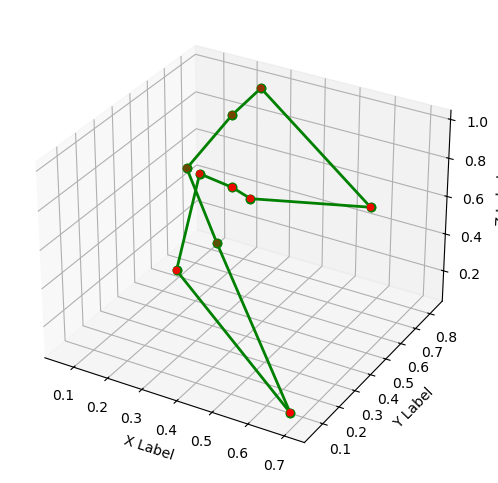

Best path length: 3.015846121508942


In [5]:
points = np.random.rand(10, 3)  # Generate 10 random 3D points
ant_colony_optimization(points, n_ants=100, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)

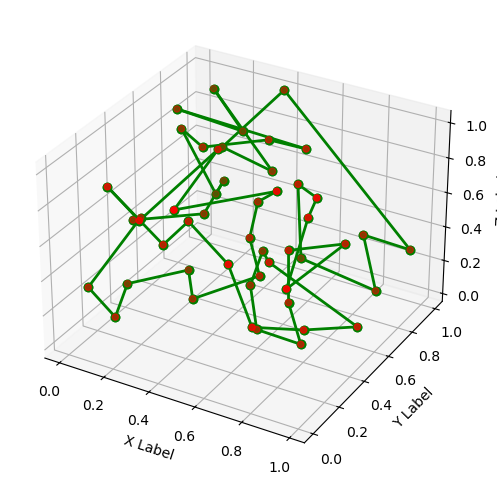

Best path length: 15.56702379130137


In [9]:
points = np.random.rand(50, 3)  # Generate 10 random 3D points
ant_colony_optimization(points, n_ants=10, n_iterations=100, alpha=1, beta=0.5, evaporation_rate=0.5, Q=1)

This implementation represents an Ant System solution. It provides a practical demonstration of  for solving TSP in 3D space, showcasing how artificial ants can collectively find optimal or near-optimal solutions by mimicking the pheromone-based pathfinding behavior of real ants.

Increasing the number of points or ants leads to a better solution, but costs a lot more computational time. This algorithm has quite high time complexity , being $O(n^2×n_{ants}×n_{iterations})$, making it uneffective for large graphs with big number of ants. 

The algorithm doesn't always give the best solutions, because of its probabilistic nature, however, it still finds a solution that is close to the best. We can see here that by simulating the same points and solving the tsp for both of them, we get a different solution both times. 

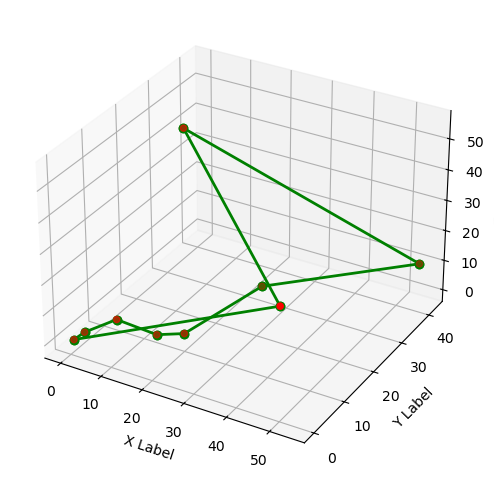

Best path length: 198.23307686169048


In [119]:
points_array = np.array([
    [0, 1, 0],
    [1, 3, 1],
    [20, 10, 2],
    [50, 0, 33],
    [10, 2, 10],
    [54, 42, 10],
    [14, 9, 0],
    [24, 30, 1],
    [11, 22, 55]
])

ant_colony_optimization(points_3d, n_ants=1, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)

There are many other possible ways to complete the Travelling Salesman Problem, including Genetic Algorithms, Greedy Algorithm, Dynamic programming, Brute Force, Tabu Search and others, some with higher and some with lower time complexity, but the Ant Colony Optimization is still a more desirable method than some of them.


### 2. Quadratic Assignment Problem (QAP)

The QAP can be described as the problem of assigning n number of facilities to n number of locations with given distances between the locations and given flows between the facilities. It was introduced by Koopmans and Beckmann in
1957 as a mathematical model for the location of a set of indivisible economical activities. The goal then is to place the facilities on locations in such a way that the sum of the product between flows and distances is minimized. 






Although extensive research has been done for more than three decades, the QAP remains one of the hardest optimization problems and no exact algorithm can solve problems of size n > 20 in reasonable computational time.


### 3. Vehicle Routing Problem (VRP)



ValueError: 'a' and 'p' must have same size

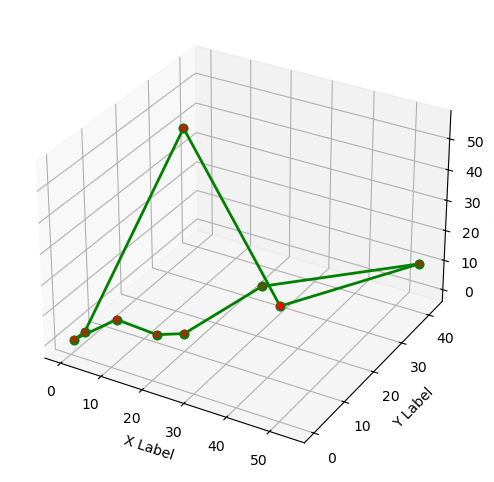

Best path length: 196.00090696680437


In [120]:
points_3d = np.array([
    [0, 1, 0],
    [1, 3, 1],
    [20, 10, 2],
    [50, 0, 33],
    [10, 2, 10],
    [54, 42, 10],
    [14, 9, 0],
    [24, 30, 1],
    [11, 22, 55]
])

ant_colony_optimization(points_3d, n_ants=1, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)

## Different variants of Ant Colony Optimization

### 1. Ant Colony System (ACS)

In ACS only the globally best ant (i.e., the ant which constructed the shortest tour from the beginning of the trial) is allowed to deposit pheromone. This choice, together with the use of the pseudo-random-proportional rule, is intended to make the search more directed: ants search in a neighborhood of the best tour found up to the current iteration of the algorithm. 

Global updating is performed after all ants have completed their tours. The pheromone level is updated by applying the global updating rule:

$$ \tau_{i,j} \leftarrow (1-\rho)  \tau_{i,j} + \alpha  \Delta\tau{i,j} $$

$\tau{i,j} = (L_{gb})^{-1}$, if $i, j$ $\in$ global-best-tour ; 
$\tau_{i,j} = 0$ otherwise

$0 < \rho < 1$ is the pheromone decay level and $L_{gb}$ is the length of the globally best tour from the beginning of the trial

The equation dictates that only those edges belonging to the globally best tour will receive reinforcement. While building a solution, ants visit edges and change their pheromone level by applying a local updating rule:

$$ \tau_{i,j} \leftarrow (1- \xi)\tau_{i,j} + \xi\tau_0 $$

Where $\xi$ is the local pheromone dacay and $\tau_0$ is the initial pheromone level. In this way ants will make a better use of pheromone information: without local updating all ants would search in a narrow neighborhood of the best previous tour.

These enhancements aim to strike a better balance between exploration and exploitation, leading to improved performance in solving combinatorial optimization problems. ACS has since become one of the most influential and widely used algorithms within the field of Ant Colony Optimization (ACO).

### 2. MAX - MIN Ant System (MMAS)

Research on ACO has shown that improved performance may be obtained by a stronger exploitation of the best solutions found during the search and the search space analysis in the previous section gives an explanation of this fact. Yet, using a greedier search potentially aggravates the problem of premature stagnation of the search. Therefore, the key to achieve best performance of ACO algorithms is to combine an improved exploitation of the best solutions found during the search with an effective mechanism for avoiding early search stagnation. MAX –MIN Ant System, which has been specifically developed to meet these requirements, differs in three key aspects from the classic Ant System:
* To exploit the best solutions found during an iteration or during the run of the algorithm, after each iteration only one single ant adds pheromone. This ant may be the one which found the best solution in the current iteration (iteration-best ant) or the one which found the best solution from the beginning of the trial (global-best ant)
* To avoid stagnation of the search the range of possible pheromone trails on each solution component is limited to an interval $[\tau_{min},\tau_{max}]$.
* Additionally, we deliberately initialize the pheromone trails to $\tau_{max}$, achieving in this way a higher exploration of solutions at the start of the algorithm.

In MMAS only one single ant is used to update the pheromone trails after each
iteration. The pheromone update rule is:
 
$$ \tau_{i,j}(t+1) = \rho\tau_{i,j}(t) + \Delta\tau_{i,j}^{best} $$

$ \Delta\tau_{i,j}^{best} = 1/f(s^{best}) $ and $ f(s^{best}) $ denotes the cost of the iteration-best solution

To avoid a situation of stagnation, where most ants only take one route. r. This can happen if at each choice point, the pheromone trail is significantly higher for one choice than for all the others. To avoid such stagnation, a limit $[\tau_{min},\tau_{max}]$ is implemented, so that pheromone values can't go below $\tau_{min}$ and above $\tau_{max}$

MMAS emphasizes exploitation more heavily than exploration. By limiting the range of pheromone levels, MMAS encourages ants to exploit the best-known paths more effectively while still allowing for some degree of exploration.

### 3. Elitist Ant System (EAS)

The Elitist Ant System introduces a mechanism to strengthen the influence of the best solutions found so far, thereby enhancing the algorithm's ability to converge to high-quality solutions. After all ants have completed their tours, the pheromone trails are updated similarly to the standard Ant System. However, EAS adds an additional update from the best ant (elitist ant), which is the ant that has found the best solution since the start of the algorithm. This additional pheromone deposit reinforces the best solution more strongly than other solutions found during the same iteration. In EAS, an additional term is added to the pheromone update formula to account for the pheromone deposited by the elite ant:

$$ \tau_{i,j} \leftarrow(1-\rho)\tau_{i,j} + \sum_{k=1}^m\Delta\tau_{i,j}^k + e\Delta\tau_{i,j}^e $$

Where $e$ is the number of elite ants (often set to 1), and $\Delta\tau_{i,j}^e$ is the pheromone deposited by the elite ant.

By allowing the best ant to deposit extra pheromone, EAS reinforces the best-known solutions more strongly than classic Ant System. This can lead to faster convergence towards high-quality solutions but also increases the risk of premature convergence to suboptimal solutions.